In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import seaborn as sb

In [49]:
#Read new processed complaint data set.
ndf = pd.read_csv('processed_complaints.csv')

In [50]:
#Examining dataframe.
ndf

,Unnamed: 0,Product,Complaint
0,38,Debt Collection,owe money never received bill indicating balan...
1,39,Debt Collection,attempting collect fund valuation service prov...
2,41,Credit Reporting and Services,experian didnt consent inquiry also name incor...
3,68,Banking Services,citibank froze account contained time make col...
4,129,Credit Reporting and Services,accordance fair credit reporting act account v...
...,...,...,...
1112415,3096750,Credit/Prepaid Cards,automated call capital one call home phone exc...
1112416,3096751,Debt Collection,disputed debt several time resolution submitte...
1112417,3096752,Mortgages,father died left son belonging also single mot...
1112418,3096753,Credit Reporting and Services,cfbp would like file complaint experian report...


In [51]:
#Eliminate 'Unnamed:0' column.
ndf.drop(['Unnamed: 0'], axis=1, inplace=True)

In [52]:
#Check how many null values are in the Complaint column.
print(ndf['Product'].isnull().sum())
print(ndf['Complaint'].isnull().sum())

0
81


In [53]:
#Eliminate all null values.
ndf = ndf.dropna()

In [34]:
ndf = ndf.sample(n=100000, random_state=42)

In [54]:
ndf

,Product,Complaint
0,Debt Collection,owe money never received bill indicating balan...
1,Debt Collection,attempting collect fund valuation service prov...
2,Credit Reporting and Services,experian didnt consent inquiry also name incor...
3,Banking Services,citibank froze account contained time make col...
4,Credit Reporting and Services,accordance fair credit reporting act account v...
...,...,...
1112415,Credit/Prepaid Cards,automated call capital one call home phone exc...
1112416,Debt Collection,disputed debt several time resolution submitte...
1112417,Mortgages,father died left son belonging also single mot...
1112418,Credit Reporting and Services,cfbp would like file complaint experian report...


In [55]:
ndf.shape

(1112339, 2)

<AxesSubplot:xlabel='count', ylabel='Product'>

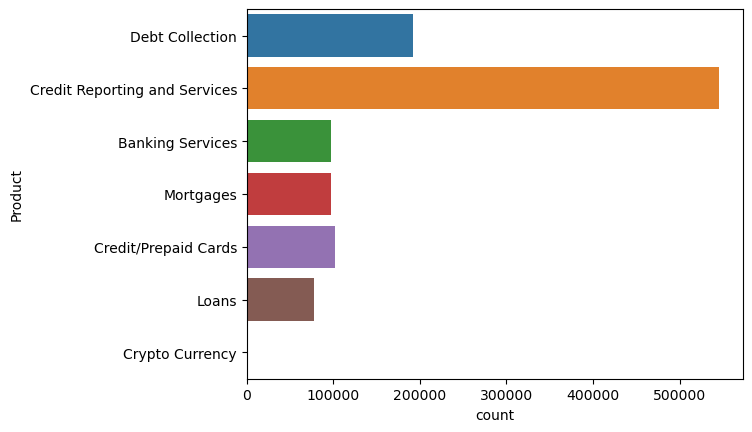

In [56]:
# Plotting the countplot for 'product' column
sb.countplot(data=ndf, y='Product')

# Encoding Product feature.

In [57]:
#View list of products in Product feature.
ndf['Product'].unique()

array(['Debt Collection', 'Credit Reporting and Services',
       'Banking Services', 'Mortgages', 'Credit/Prepaid Cards', 'Loans',
       'Crypto Currency'], dtype=object)

In [58]:
#Encode products in numeric values.
ndf['Product'].replace({'Debt Collection' : 0, 
                        'Credit Reporting and Services' : 1,
                        'Banking Services' : 2,
                        'Mortgages' : 3,
                        'Credit/Prepaid Cards' : 4,
                        'Loans' : 5,
                        'Crypto Currency' : 6}, inplace=True)

/var/folders/3n/y6l_g9s960lc_759jvhdhxp40000gn/T/ipykernel_5865/2326779837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Product'].replace({'Debt Collection' : 0,


In [59]:
ndf.isna().sum()

Product      0
Complaint    0
dtype: int64

# Generate training and test set.

In [60]:
#Create train and test sets.
x = ndf['Complaint']
y = ndf['Product']

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [62]:
print("Training set size:" , x_train.shape)
print("Test set size:" , x_test.shape)

Training set size: (889871,)
Test set size: (222468,)


# Obtaining relevance of words from complaint narratives.

In [84]:
tfidf = TfidfVectorizer(max_features=1000000, ngram_range=(1,2), min_df=3, stop_words='english', use_idf=1)
tfidf_x_train = tfidf.fit_transform(x_train)
tfidf_x_test = tfidf.transform(x_test)

# Modeling with Multinominal Naive Bayes classifier.

In [85]:
nb = MultinomialNB()
nb.fit(tfidf_x_train, y_train)

MultinomialNB()

In [86]:
#Predictions for training and testing set.
pred_y_train = nb.predict(tfidf_x_train)
pred_y_test = nb.predict(tfidf_x_test)

In [87]:
print('Prediction Accuracy (Train): ', accuracy_score(y_train, pred_y_train))
print('Prediction Accuracy (Test): ', accuracy_score(y_test, pred_y_test))

Prediction Accuracy (Train):  0.8659266343099168
Prediction Accuracy (Test):  0.8516640595501376


In [88]:
print('Classification Report for Naive Bayes (Train Data)\n', classification_report(y_train, pred_y_train))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Naive Bayes (Train Data)
               precision    recall  f1-score   support

           0       0.83      0.76      0.79    153511
           1       0.88      0.94      0.91    436362
           2       0.87      0.90      0.88     77940
           3       0.89      0.93      0.91     78388
           4       0.82      0.76      0.79     81704
           5       0.87      0.64      0.74     61954
           6       0.00      0.00      0.00        12

    accuracy                           0.87    889871
   macro avg       0.74      0.70      0.72    889871
weighted avg       0.86      0.87      0.86    889871



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
print('Classification Report for Naive Bayes (Test Data)\n', classification_report(y_test, pred_y_test))

Classification Report for Naive Bayes (Test Data)
               precision    recall  f1-score   support

           0       0.81      0.74      0.77     38416
           1       0.87      0.93      0.90    109456
           2       0.85      0.88      0.87     19478
           3       0.87      0.92      0.90     19356
           4       0.80      0.73      0.76     20368
           5       0.86      0.60      0.71     15390
           6       0.00      0.00      0.00         4

    accuracy                           0.85    222468
   macro avg       0.72      0.69      0.70    222468
weighted avg       0.85      0.85      0.85    222468



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix for Naive Bayes (Train)


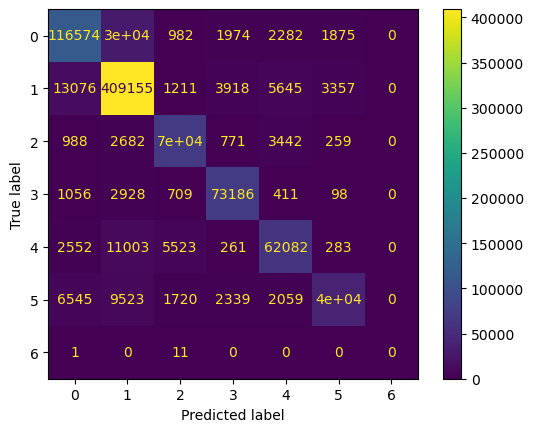

In [90]:
cmat_train = confusion_matrix(y_train, pred_y_train)

cmat_train_fig = metrics.ConfusionMatrixDisplay(confusion_matrix = cmat_train)
cmat_train_fig.plot()

print('Confusion Matrix for Naive Bayes (Train)')
plt.show()

Confusion Matrix for Naive Bayes (Test)


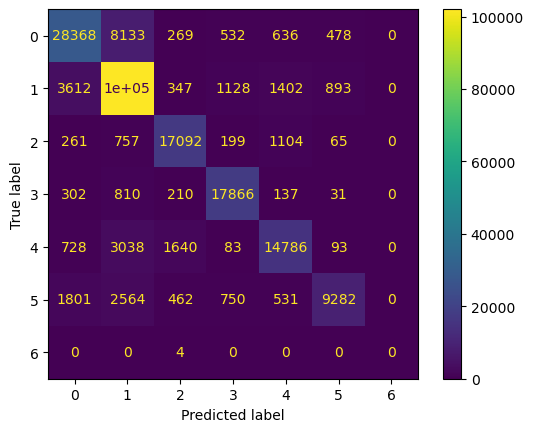

In [94]:
cmat_test = confusion_matrix(y_test, pred_y_test)

cmat_test_fig = metrics.ConfusionMatrixDisplay(confusion_matrix = cmat_test)
cmat_test_fig.plot()

print('Confusion Matrix for Naive Bayes (Test)')
plt.show()